In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests


# Import the API key.
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8362f4de456c9922690c291dccdb6ed3


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | marawi
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | todos santos
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | quatre cocos
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | taytay
Processing Record 15 of Set 1 | gobabis
Processing Record 16 of Set 1 | avera
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | gambela
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | he

Processing Record 38 of Set 4 | arlit
Processing Record 39 of Set 4 | asyut
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | lubao
Processing Record 43 of Set 4 | nizwa
Processing Record 44 of Set 4 | ahumada
City not found. Skipping...
Processing Record 45 of Set 4 | nelson bay
Processing Record 46 of Set 4 | atasu
Processing Record 47 of Set 4 | krasnoselkup
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | new ulm
Processing Record 1 of Set 5 | oskarshamn
Processing Record 2 of Set 5 | peniche
Processing Record 3 of Set 5 | itaituba
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | gat
Processing Record 6 of Set 5 | lufilufi
Processing Record 7 of Set 5 | mareeba
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | yerbogachen
Processing Record 10 of Set 5 | kodiak
Processing Record 11 of 

Processing Record 30 of Set 8 | iranshahr
Processing Record 31 of Set 8 | anchorage
Processing Record 32 of Set 8 | gushikawa
Processing Record 33 of Set 8 | mendahara
City not found. Skipping...
Processing Record 34 of Set 8 | saskylakh
Processing Record 35 of Set 8 | conceicao do mato dentro
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | vostok
Processing Record 38 of Set 8 | altamont
Processing Record 39 of Set 8 | san rafael del sur
Processing Record 40 of Set 8 | vanimo
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 43 of Set 8 | carnarvon
Processing Record 44 of Set 8 | soyo
Processing Record 45 of Set 8 | agadir
Processing Record 46 of Set 8 | urumqi
Processing Record 47 of Set 8 | cravo norte
Processing Record 48 of Set 8 | dehloran
Processing Record 49 of Set 8 | sao filipe
Processing Record 50 of Set 8 | alta floresta
Processing Record 1 of Set 9 | usakos


Processing Record 19 of Set 12 | jahrom
City not found. Skipping...
Processing Record 20 of Set 12 | perth
Processing Record 21 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 22 of Set 12 | king city
Processing Record 23 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 24 of Set 12 | letterkenny
Processing Record 25 of Set 12 | watsa
Processing Record 26 of Set 12 | kuryk
Processing Record 27 of Set 12 | sola
Processing Record 28 of Set 12 | pangai
Processing Record 29 of Set 12 | pravia
Processing Record 30 of Set 12 | ilulissat
Processing Record 31 of Set 12 | bubaque
Processing Record 32 of Set 12 | shingu
Processing Record 33 of Set 12 | upington
Processing Record 34 of Set 12 | kalispell
Processing Record 35 of Set 12 | foam lake
Processing Record 36 of Set 12 | ucluelet
Processing Record 37 of Set 12 | belyy yar
Processing Record 38 of Set 12 | yoichi
Processing Record 39 of Set 12 | tambacounda
Processing Record 40 of Set 12 | sosnovo-oz

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,39.87,88,100,8.88,RU,2021-11-16 15:08:18
1,Marawi,7.9986,124.2928,66.65,94,100,1.99,PH,2021-11-16 15:08:18
2,Mataura,-46.1927,168.8643,44.10,97,100,11.23,NZ,2021-11-16 15:08:18
3,New Norfolk,-42.7826,147.0587,49.50,68,42,1.01,AU,2021-11-16 15:08:18
4,Port Alfred,-33.5906,26.8910,66.38,77,100,12.86,ZA,2021-11-16 15:08:19
5,Todos Santos,23.4500,-110.2167,78.01,39,100,4.94,MX,2021-11-16 15:08:19
6,Tura,25.5198,90.2201,62.98,86,0,3.09,IN,2021-11-16 15:08:19
7,Quatre Cocos,-20.2078,57.7625,77.09,65,1,8.59,MU,2021-11-16 15:08:20
8,Albany,42.6001,-73.9662,41.45,68,11,4.00,US,2021-11-16 15:06:40
9,Cape Town,-33.9258,18.4232,71.11,50,100,12.84,ZA,2021-11-16 15:07:15


In [16]:
#reorder the columns
new_column_order_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
df_new_order = city_data_df[new_column_order_df]
df_new_order

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-11-16 15:08:18,59.7035,30.7861,39.87,88,100,8.88
1,Marawi,PH,2021-11-16 15:08:18,7.9986,124.2928,66.65,94,100,1.99
2,Mataura,NZ,2021-11-16 15:08:18,-46.1927,168.8643,44.10,97,100,11.23
3,New Norfolk,AU,2021-11-16 15:08:18,-42.7826,147.0587,49.50,68,42,1.01
4,Port Alfred,ZA,2021-11-16 15:08:19,-33.5906,26.8910,66.38,77,100,12.86
...,...,...,...,...,...,...,...,...,...
582,Zhangjiakou,CN,2021-11-16 15:23:45,40.8100,114.8794,32.31,71,1,0.38
583,Baglung,NP,2021-11-16 15:23:46,28.2719,83.5898,54.59,84,3,4.05
584,Namibe,AO,2021-11-16 15:23:46,-15.1961,12.1522,74.71,70,19,9.48
585,Andros Town,BS,2021-11-16 15:20:15,24.7000,-77.7667,78.76,64,100,20.11


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/16/21'

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

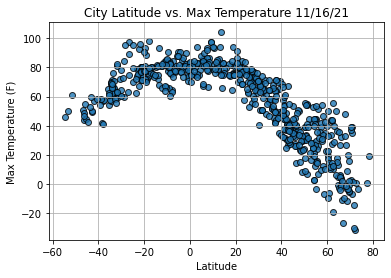

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

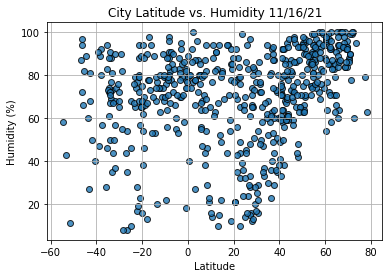

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

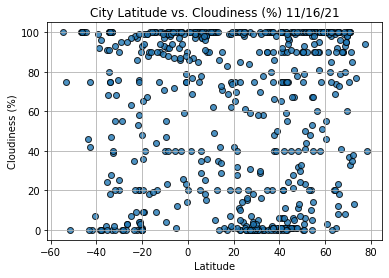

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

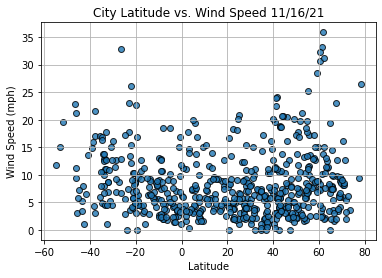

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()